# Sales order data exploration
Use this notebook to explore sales order data 

In [16]:
df = spark.read.format("csv").option("header","true").load("Files/orders/2019.csv")
# df now is a Spark DataFrame containing CSV data from "Files/orders/2019.csv".
display(df)

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 17, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, a780e10a-4c3a-438a-ae7b-adc8c693ffa9)

In [17]:
df = spark.read.format("csv").option("header", "false").load("Files/orders/2019.csv")

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 18, Finished, Available, Finished)

## Loading One file with Pre-derined Schema

In [18]:
from pyspark.sql.types import *

orderSchema = StructType([
     StructField("SalesOrderNumber"     ,    StringType()),
     StructField("SalesOrderLineNumber" ,    IntegerType()),
     StructField("OrderDate"            ,    DateType()),
     StructField("CustomerName"         ,    StringType()),
     StructField("Email"                ,    StringType()),
     StructField("Item"                 ,    StringType()),
     StructField("Quantity"             ,    IntegerType()),
     StructField("UnitPrice"            ,    FloatType()),
     StructField("Tax"                  ,    FloatType())
 ])

df = spark.read.format("csv").schema(orderSchema).load("Files/orders/2019.csv")

display(df)

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 19, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, e0f39c02-bfa0-4017-a80c-4eb0ae12b01c)

## Loading Multiple Files with Pre-defined Schema

In [19]:
from pyspark.sql.types import *

orderSchema = StructType([
     StructField("SalesOrderNumber"     ,    StringType()),
     StructField("SalesOrderLineNumber" ,    IntegerType()),
     StructField("OrderDate"            ,    DateType()),
     StructField("CustomerName"         ,    StringType()),
     StructField("Email"                ,    StringType()),
     StructField("Item"                 ,    StringType()),
     StructField("Quantity"             ,    IntegerType()),
     StructField("UnitPrice"            ,    FloatType()),
     StructField("Tax"                  ,    FloatType())
 ])

df = spark.read.format("csv").schema(orderSchema).load("Files/orders/*.csv")

display(df)

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 20, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 57dc3239-4bde-4ebf-bdad-cc83d267095c)

## Selection and Filtering

In [20]:
custDf = df["CustomerName", "Email"]

print("Total Customers", custDf.count())
print("Distinct Customers", custDf.distinct().count())

display(custDf.distinct())

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 21, Finished, Available, Finished)

Total Customers 32718
Distinct Customers 12427


SynapseWidget(Synapse.DataFrame, 0605f111-b988-437e-a9b4-c4ac6bbfd6b9)

In [21]:
customers = df.select("CustomerName", "Email").where(df['Item']=='Road-250 Red, 52')
print(customers.count())
print(customers.distinct().count())

display(customers.distinct())

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 22, Finished, Available, Finished)

133
133


SynapseWidget(Synapse.DataFrame, 0c909c3d-2f73-4539-9eac-93967bdd4f2c)

## Group and Aggregation

In [22]:
productSales = df.select("Item", "Quantity").groupBy("Item").sum()

display(productSales)

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 23, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 72b2af3e-06c8-411f-8791-3e41bd6d42d3)

## Spark SQL

In [23]:
 # Number of Sales orders year wise
from pyspark.sql.functions import *

yearlySales = df.select(year(col("OrderDate")).alias("Year")).groupBy("Year").count().orderBy("Year")

display(yearlySales)

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 24, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, acf15a1a-80f3-4f02-9eef-7da8a151f7a6)

## Using Spark to transform data files

In [24]:
from pyspark.sql.functions import *

# Create Year and Month columns
transformed_df = df.withColumn("Year", year(col("OrderDate"))).withColumn("Month", month(col("OrderDate")))

# Create the new FirstName and LastName fields
transformed_df = transformed_df.withColumn("FirstName", split(col("CustomerName"), " ").getItem(0)).withColumn("LastName", split(col("CustomerName") , " ").getItem(1))

# Filter and reorder columns
transformed_df = transformed_df["SalesOrderNumber", "SalesOrderLineNumber", "OrderDate", "Year", "Month", "FirstName", "LastName", "Email", "Item", "Quantity", "UnitPrice", "Tax"]

# Display the first five orders
display(transformed_df.limit(5))

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 25, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, e6427ba5-60f2-4e1e-a972-1286443b0c1b)

In [25]:
transformed_df.write.mode("overwrite").parquet('Files/transformed_data/orders')

print ("Transformed data saved!")

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 26, Finished, Available, Finished)

Transformed data saved!


In [26]:
orders_df = spark.read.format('parquet').load('Files/transformed_data/orders')
display(orders_df)

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 27, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 060f3cbe-4145-4f86-b7fe-3142fe2090ea)

In [27]:
orders_df.write.partitionBy("Year","Month").mode("overwrite").parquet("Files/partitioned_data")
print ("Transformed data saved!")

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 28, Finished, Available, Finished)

Transformed data saved!


In [28]:
orders_2021_df = spark.read.format("parquet").load("Files/partitioned_data/Year=2021/Month=*")

display(orders_2021_df)

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 29, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 0714d3b6-2332-45cb-9e16-0066e3d6c7ba)

## Work with tables and SQL

In [29]:
# Create a new table
df.write.format("delta").saveAsTable("salesorders")

# Get the table description
spark.sql("DESCRIBE EXTENDED salesorders").show(truncate=False)

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 30, Finished, Available, Finished)

+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------+-------+
|col_name                    |data_type                                                                                                                            |comment|
+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------+-------+
|SalesOrderNumber            |string                                                                                                                               |NULL   |
|SalesOrderLineNumber        |int                                                                                                                                  |NULL   |
|OrderDate                   |date                                                                                                     

In [30]:
df = spark.sql("SELECT * FROM ApacheSprakLakeHouseExercise.salesorders LIMIT 1000")
display(df)

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 31, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, cf8800e3-df68-4dc1-9034-b580e16707dd)

In [31]:
%%sql
SELECT YEAR(OrderDate) AS OrderYear,
        SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue
FROM salesorders
GROUP BY YEAR(OrderDate)
ORDER BY OrderYear;

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 32, Finished, Available, Finished)

<Spark SQL result set with 3 rows and 2 fields>

## Visualize data with Spark

In [32]:
 %%sql
 SELECT * FROM salesorders

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 33, Finished, Available, Finished)

<Spark SQL result set with 1000 rows and 9 fields>

In [33]:
sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                 SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue \
             FROM salesorders \
             GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
             ORDER BY OrderYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 34, Finished, Available, Finished)

+---------+--------------------+
|OrderYear|        GrossRevenue|
+---------+--------------------+
|     2019|   4172169.969970703|
|     2020|   6882259.268127441|
|     2021|1.1547835291696548E7|
+---------+--------------------+



StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 35, Finished, Available, Finished)

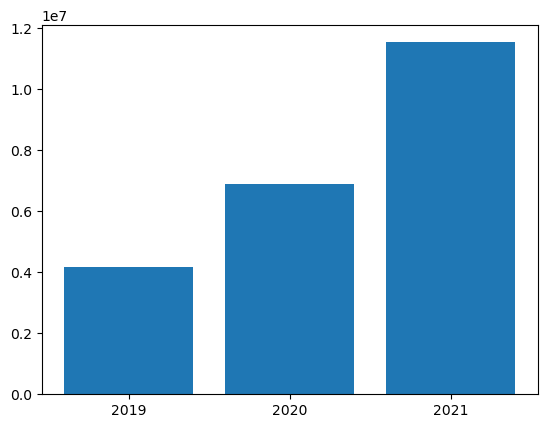

In [34]:
from matplotlib import pyplot as plt

# matplotlib requires a Pandas dataframe, not a Spark one
df_sales = df_spark.toPandas()

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'])

# Display the plot
plt.show()

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 42, Finished, Available, Finished)

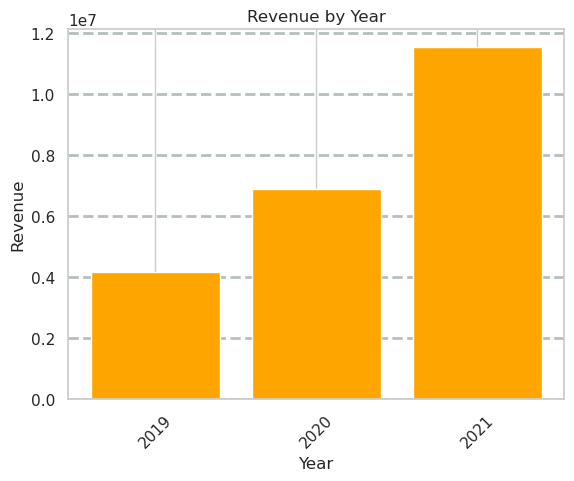

In [41]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

# Show the figure
plt.show()

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 37, Finished, Available, Finished)

<Figure size 640x480 with 0 Axes>

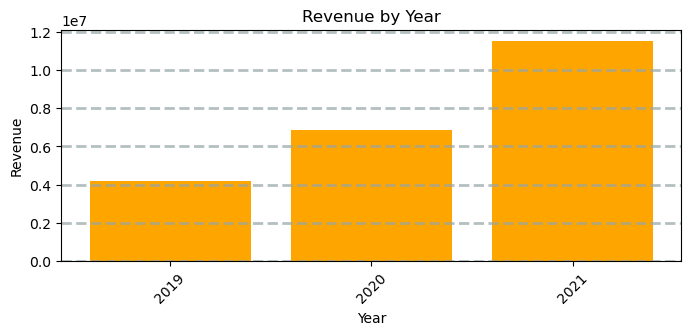

In [36]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of revenue by year
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')

# Customize the chart
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)

# Show the figure
plt.show()

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 48, Finished, Available, Finished)

<Figure size 640x480 with 0 Axes>

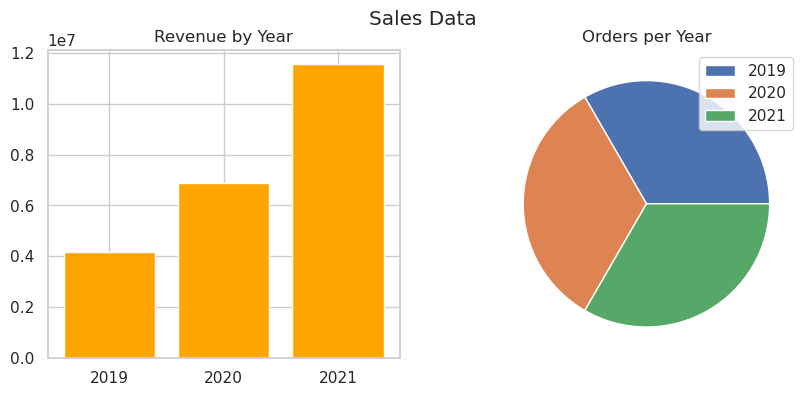

In [47]:
from matplotlib import pyplot as plt

# Clear the plot area
plt.clf()

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of revenue by year on the first axis
ax[0].bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
ax[0].set_title('Revenue by Year')
# ax[0].xlabel('Year')
# ax[0].ylabel('Revenue')

# Create a pie chart of yearly order counts on the second axis
yearly_counts = df_sales['OrderYear'].value_counts()
ax[1].pie(yearly_counts)
ax[1].set_title('Orders per Year')
ax[1].legend(yearly_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Sales Data')

# Show the figure
plt.show()

## Use the seaborn library

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 39, Finished, Available, Finished)

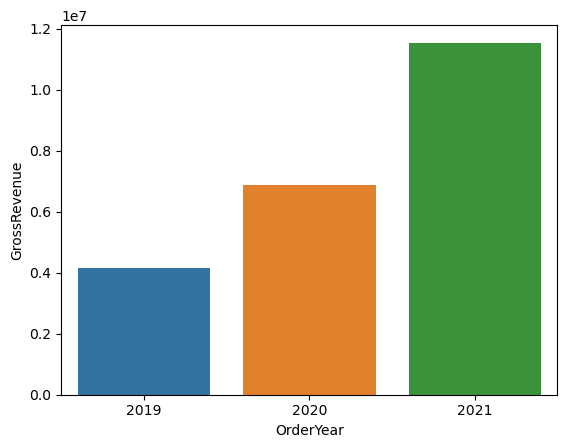

In [38]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)

plt.show()

StatementMeta(, 8d78b25f-5b04-4cb2-916d-f6bc1e728b2b, 40, Finished, Available, Finished)

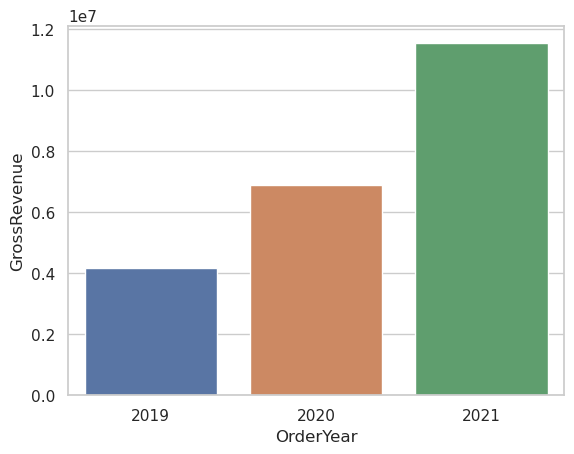

In [39]:
import seaborn as sns

 # Clear the plot area
plt.clf()

 # Set the visual theme for seaborn
sns.set_theme(style="whitegrid")

 # Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)

plt.show()